In [97]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import fitness_mcmc
import fitness_mcmc.data_io as io
import fitness_mcmc.fitness_mcmc as m

[[ 13439   2064      0      0      0      0]
 [ 12698   1987      0      0      0      0]
 [ 16799   2535      0      0      0      0]
 [ 12833   1963      0      0      0      0]
 [ 17980   2752      0      0      0      0]
 [ 16960   2473      0      0      0      0]
 [ 16440   2386      0      0      0      0]
 [ 13905   2077      0      0      0      0]
 [ 15732   2448      0      0      0      0]
 [ 16299   2264      0      0      0      0]
 [ 15367   2364      0      0      0      0]
 [ 17082   2438      0      0      0      0]
 [ 14917   2309      0      0      0      0]
 [ 14290   2139      0      0      0      0]
 [ 15905   2351      0      0      0      0]
 [ 17227   2373      0      0      0      0]
 [ 13856   2197      0      0      0      0]
 [ 13012   2140      0      0      0      0]
 [ 15562   2413      0      0      0      0]
 [  3987      0      0      0      0      0]
 [  3558   1157      0      0      0      0]
 [  3581   1722      0   1390      0      0]
 [  3370  

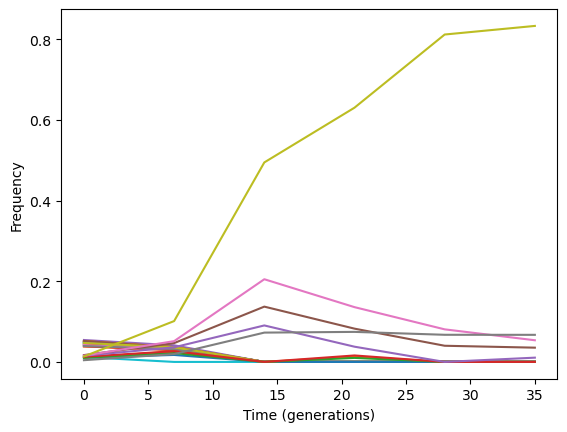

In [98]:
environment = "gluL"
replicate = 1
r = environment + str(replicate)

data, time, ordered_counts = io.load_data("LTEE_" + r + ".csv", return_ordered = False, delimiter=",")
print(ordered_counts.astype("int"))
print(data)

ordered_frequencies = ordered_counts / np.sum(ordered_counts, axis = 0)

plt.plot([0,7,14,21,28,35], ordered_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [99]:
fitness_model = m.Fitness_Model(ordered_counts, time, s_ref = 0, prior="flat")
fitness_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


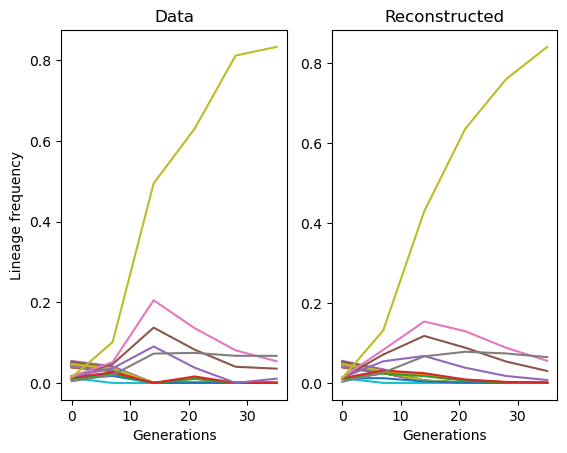

In [100]:
fitness_model.plot_MAP_estimate(type = "lin", filename="LTEE_" + r + "_freq.png")
raw_s = fitness_model.map_estimate["s"]
vals_f0 = fitness_model.map_estimate["f0"]
vals_s = np.zeros((29))
vals_s[0] = 0
for i in range(0, len(raw_s)):
    vals_s[i + 1] = raw_s[i]
vals_data = fitness_model.data
#print(vals_data)

In [101]:
out = open("Fitness_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35,s,f0"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(vals_data[l][h])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()

In [102]:
traj = m.create_trajectories(vals_f0, vals_s, time)
err_data = m.sample_lineages(traj, 100000)
print(err_data)

[[ 4229  2540   481    40     0     0]
 [ 3933  2393   438    45     2     0]
 [ 5217  3106   582    43     2     1]
 [ 3805  2364   406    46     1     0]
 [ 5496  3475   630    54     9     0]
 [ 5286  3128   569    49     3     0]
 [ 4979  2981   532    39     3     0]
 [ 4245  2496   438    33     2     0]
 [ 4809  2998   551    49     1     1]
 [ 5018  2872   491    51     6     0]
 [ 4705  2915   535    39     4     0]
 [ 5268  2962   534    51     2     0]
 [ 4566  2728   554    49     3     0]
 [ 4488  2731   483    38    10     0]
 [ 4865  2915   543    48     3     0]
 [ 5394  2965   491    39     0     1]
 [ 4299  2755   507    43     2     0]
 [ 4041  2502   528    43     4     0]
 [ 4872  3002   572    40     1     0]
 [ 1167     0     0     0     0     0]
 [ 1179  1171   388    56     6     0]
 [ 1018  2658  2055   737   208    55]
 [  961  2417  1767   584   150    38]
 [ 1180  3105  2425   883   234    62]
 [ 1307  5487  6828  3827  1720   685]
 [ 1262  7206 11724  8809

In [103]:
out = open("C:\\Users\\jedwa\\Documents\\Desai_Lab\\LTEE\\Fitness_code\\fitness_mcmc\\fitness_mcmc\\experimental_data\\Sim_counts_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l])
    for h in range(0, 6):
        holder += ',' + str(err_data[l][h])
    out.write(holder)
    out.write("\n")
out.close()

[[ 4229  2540   481    40     0     0]
 [ 3933  2393   438    45     2     0]
 [ 5217  3106   582    43     2     1]
 [ 3805  2364   406    46     1     0]
 [ 5496  3475   630    54     9     0]
 [ 5286  3128   569    49     3     0]
 [ 4979  2981   532    39     3     0]
 [ 4245  2496   438    33     2     0]
 [ 4809  2998   551    49     1     1]
 [ 5018  2872   491    51     6     0]
 [ 4705  2915   535    39     4     0]
 [ 5268  2962   534    51     2     0]
 [ 4566  2728   554    49     3     0]
 [ 4488  2731   483    38    10     0]
 [ 4865  2915   543    48     3     0]
 [ 5394  2965   491    39     0     1]
 [ 4299  2755   507    43     2     0]
 [ 4041  2502   528    43     4     0]
 [ 4872  3002   572    40     1     0]
 [ 1167     0     0     0     0     0]
 [ 1179  1171   388    56     6     0]
 [ 1018  2658  2055   737   208    55]
 [  961  2417  1767   584   150    38]
 [ 1180  3105  2425   883   234    62]
 [ 1307  5487  6828  3827  1720   685]
 [ 1262  7206 11724  8809

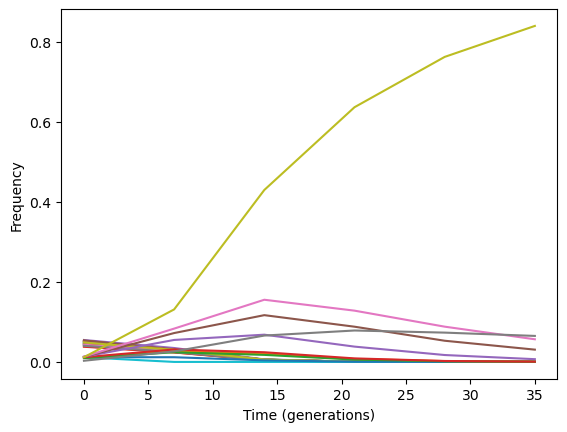

In [104]:
data, time, err_counts = io.load_data("Sim_counts_" + r + ".csv", return_ordered = False, delimiter=",")
print(err_counts.astype("int"))
print(data)

err_frequencies = err_counts / np.sum(err_counts, axis = 0)

plt.plot([0,7,14,21,28,35], err_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [105]:
err_model = m.Fitness_Model(err_counts, time, s_ref = 0, prior="flat")
err_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [107]:
#err_model.plot_MAP_estimate(type = "lin", filename="Error_" + r + "_freq.png")
e_raw_s = err_model.map_estimate["s"]
e_vals_f0 = err_model.map_estimate["f0"]
e_vals_s = np.zeros((29))
e_vals_s[0] = 0
for i in range(0, len(e_raw_s)):
    e_vals_s[i + 1] = e_raw_s[i]
e_vals_data = err_model.data

In [109]:
out = open("FitnessError_" + r + ".csv", "w")
header = "BC,s,f0,s_err,f0_err"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
for l in range(0, len(e_vals_s)):
    holder = str(bc[l])
    holder += ',' + str(vals_s[l]) + ',' + str(vals_f0[l]) + ',' + str(e_vals_s[l]) + ',' + str(e_vals_f0[l])
    out.write(holder)
    out.write("\n")
out.close()